In [5]:


import numpy as np
from matplotlib import pyplot as plt

In [51]:


n = 1000

sigma = 1
w = 5 * sigma
x = np.arange(-w,w,1/n)

y = np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
y = y / np.max(y)  # Normalize the function to the range [0, 1]
y_ext = np.where(y > 0.9, 20*y, y)

# Smoothing kernel
smoothing_sigma = 0.5
# kernel = np.exp(-x**2 / (2 * smoothing_sigma**2)) / (smoothing_sigma * np.sqrt(2 * np.pi)) / n
scale  = 2
kernel = np.exp(-np.abs(x) / scale)
# Normalize the kernel
kernel = kernel / np.sum(kernel)  # Ensure the kernel sums to 1
# Convolve both functions with the smoothing kernel
y_convolved = np.convolve(y, kernel, mode='same')
y_ext_convolved = np.convolve(y_ext, kernel, mode='same')


[]

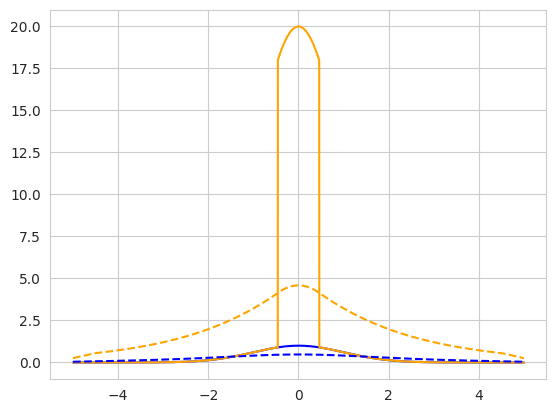

In [52]:
plt.plot(x, y, label='f(x) = exp(-x^2)', color='blue')
plt.plot(x, y_ext, label='f(x) = exp(-x^2) with extension', color='orange')
# plt.plot(x, kernel, label='Smoothing Kernel', color='green', linestyle='--')
plt.plot(x, y_convolved, label='Convolved f(x)', color='blue', linestyle='--')
plt.plot(x, y_ext_convolved, label='Convolved f(x) with extension', color='orange', linestyle='--')
plt.plot()

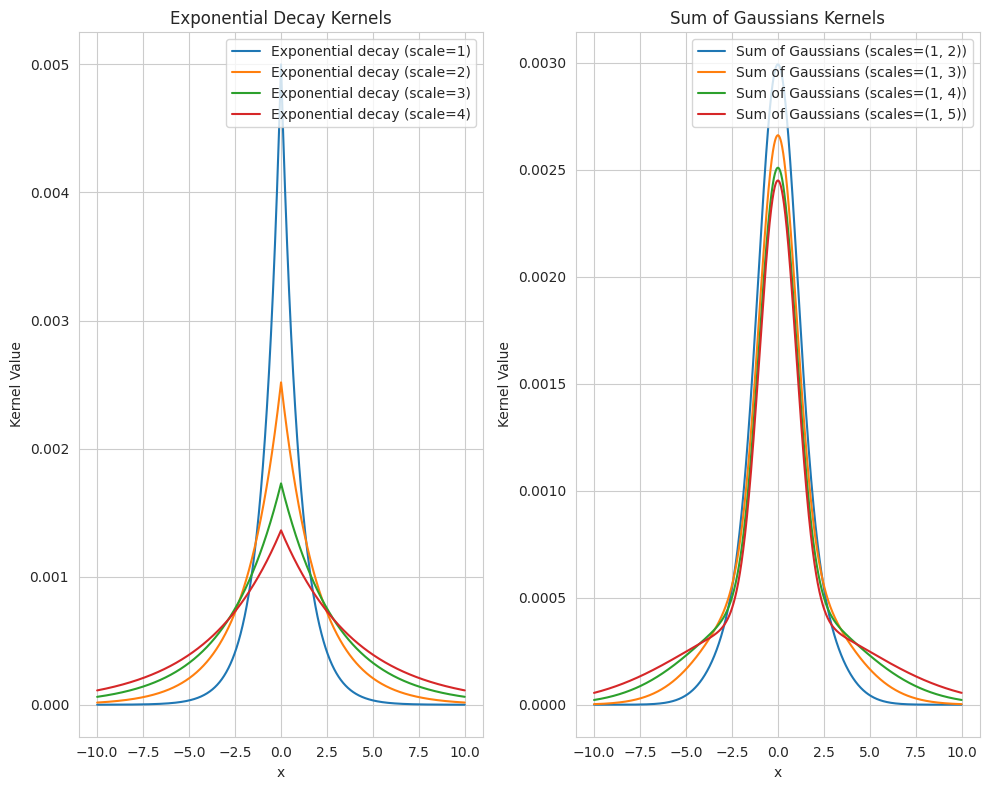

In [63]:
def exp_decay(x, scale):
    """Exponential decay function. Normalized to sum to 1."""
    kernel = np.exp(-np.abs(x) / scale)
    return kernel / np.sum(kernel)  # Ensure the kernel sums to 1
def sum_of_gaussians(x, *scales):
    """Sum of Gaussian functions with different scales."""
    kernel = np.sum([np.exp(-x**2 / (2 * scale**2)) / (scale * np.sqrt(2 * np.pi)) for scale in scales], axis=0)
    return kernel / np.sum(kernel)  # Ensure the kernel sums to 1


kernel_exp_hyperparams = [(1,), (2,), (3,), (4,)]
exp_kernels = [ exp_decay, exp_decay, exp_decay, exp_decay]

kernel_sog_hyperparams = [(1,2), (1,3), (1,4), (1,5)]
sog_kernels = [sum_of_gaussians, sum_of_gaussians, sum_of_gaussians, sum_of_gaussians]

# plot the kernels
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

for i, (kernel, hyperparams) in enumerate(zip(exp_kernels, kernel_exp_hyperparams)):
    x = np.arange(-10, 10, 0.01)
    y = kernel(x, *hyperparams)
    ax[0].plot(x, y, label=f'Exponential decay (scale={hyperparams[0]})')
for i, (kernel, hyperparams) in enumerate(zip(sog_kernels, kernel_sog_hyperparams)):
    x = np.arange(-10, 10, 0.01)
    y = kernel(x, *hyperparams)
    ax[1].plot(x, y, label=f'Sum of Gaussians (scales={hyperparams})')
ax[0].set_title('Exponential Decay Kernels')
ax[1].set_title('Sum of Gaussians Kernels')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('Kernel Value')
ax[1].set_ylabel('Kernel Value')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()



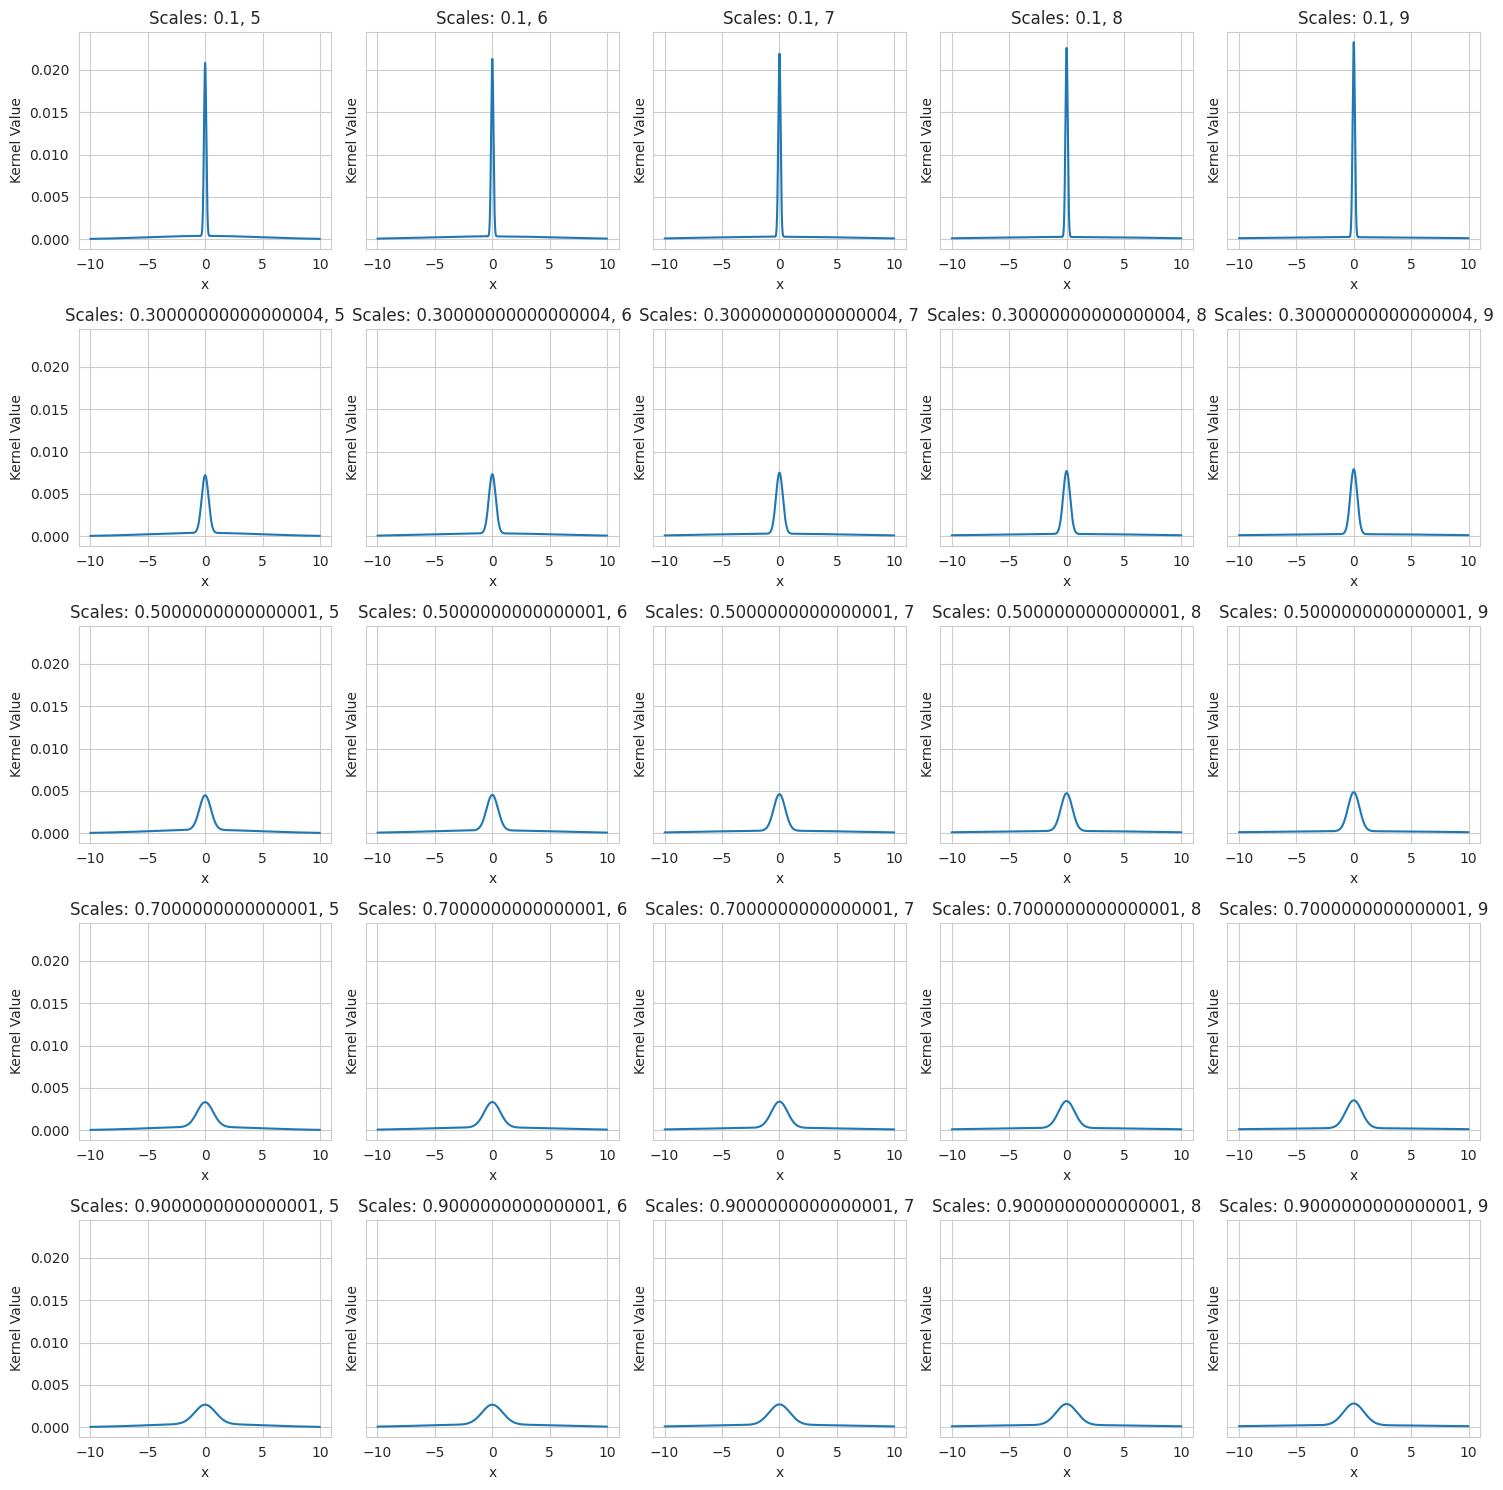

In [70]:
# Plot sum of gaussians with different scales in a matrix for 5x5 different scale combinations.
# have the y axis be the same for all plots
fig, axs = plt.subplots(5, 5, figsize=(15, 15), sharey=True)
x = np.arange(-10, 10, 0.01)
# Set y-axis limits for the first plot
for i, scale1 in enumerate(np.arange(0.1, 1.1, 0.2)):
    for j, scale2 in enumerate(range(5, 10)):
        y = sum_of_gaussians(x, scale1, scale2)
        axs[i, j].plot(x, y)
        axs[i, j].set_title(f'Scales: {scale1}, {scale2}')
        axs[i, j].set_xlabel('x')
        axs[i, j].set_ylabel('Kernel Value')
        axs[i, j].grid(True)    
plt.tight_layout()  


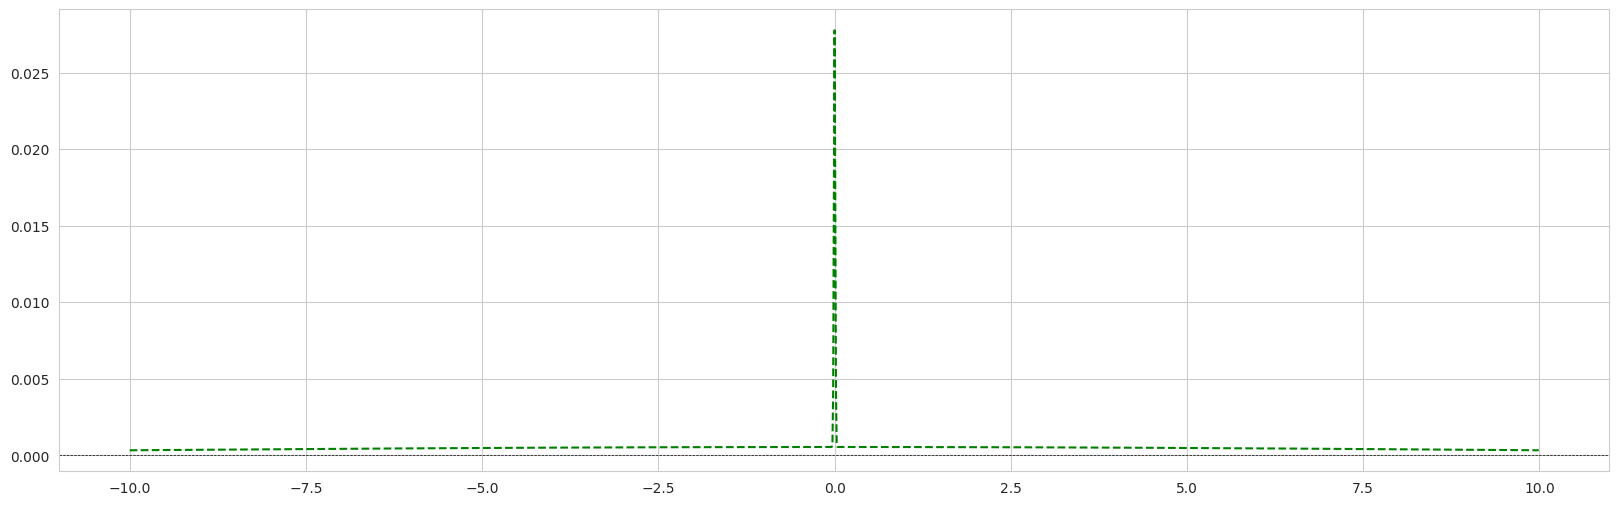

In [88]:
"""Sum of Gaussian functions with different scales."""
sigma1 = 0.01
sigma2 = 10
ratio = 20
g1 = np.exp(-np.arange(-10, 10, 0.01)**2 / (2 * sigma1**2)) / (sigma1 * np.sqrt(2 * np.pi))
g2 = ratio * np.exp(-np.arange(-10, 10, 0.01)**2 / (2 * sigma2**2)) / (sigma2 * np.sqrt(2 * np.pi))
g_sum = g1 + g2
# Normalize the sum to ensure it sums to 1
g_sum /= np.sum(g_sum)
g1 /= np.sum(g1)
g2 /= np.sum(g2)
# Plot the individual Gaussian functions and their sum
plt.figure(figsize=(20, 6))
# plt.plot(x, g1, label=f'Gaussian 1 (scale={scale1})', color='blue')
# plt.plot(x, g2, label=f'Gaussian 2 (scale={scale2})', color='orange')
plt.plot(x, g_sum, label='Sum of Gaussians', color='green', linestyle='--')
# Show the zero line
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.show()